# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

Done manually using the web interface

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [13]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon 
# Without --no-cache-dir, smaller aws instances may have trouble installing
!pip install kaggle ## added
!pip install bokeh==2.0.1 ## added


  Using cached setuptools-69.0.3-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-69.0.3-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.34 requires setuptools~=60.2.0, but you have setuptools 69.0.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 4.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3


In [43]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [44]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

train = pd.read_csv('data/train.csv')  
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [46]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [47]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [48]:
df_train_col_clean = train.drop(['casual', 'registered'], axis=1)

# df_train_col_clean.head()

predictor = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_col_clean,
    presets="best_quality",
    time_limit=600 #seconds
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240122_161748"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240122_161748/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 163 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 437 seconds.
Starting full fit now with num_stack_leve

### Review AutoGluon's training run with ranking of models that did the best.

In [49]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -50.277721  root_mean_squared_error       8.908127  343.791971                0.000262           0.274959            3       True         28
1        NeuralNetFastAI_BAG_L2  -51.574827  root_mean_squared_error       8.143567  284.527683                0.105038          14.561353            2       True         23
2        RandomForestMSE_BAG_L2  -53.446874  root_mean_squared_error       8.372812  278.412268                0.334282           8.445939            2       True         20
3          ExtraTreesMSE_BAG_L2  -54.271133  root_mean_squared_error       8.368603  272.048068                0.330073           2.081738            2       True         22
4         NeuralNetTorch_BAG_L2  -54.359675  root_mean_squared_error

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleMode

### Create predictions from test dataset

In [50]:
predictions = predictor.predict(test)
predictions.head()


0    24.233217
1    40.956390
2    45.569221
3    47.313446
4    49.686825
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [51]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.400848
std        88.615242
min         2.760353
25%        21.850719
50%        66.627937
75%       169.611557
max       354.176300
Name: count, dtype: float64

In [52]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [53]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [54]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"


100%|████████████████████████████████████████| 188k/188k [00:03<00:00, 61.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-01-22 16:28:19  first raw submission               complete  1.78497      1.78497       
submission_hp2.csv           2024-01-22 16:03:52  hp2                                complete  0.65094      0.65094       
submission_hp1.csv           2024-01-22 15:51:33  hp1                                complete  0.53757      0.53757       
submission_hp1.csv           2024-01-22 15:51:03  hp1                                complete  0.53757      0.53757       


#### Initial score of `1.78497`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

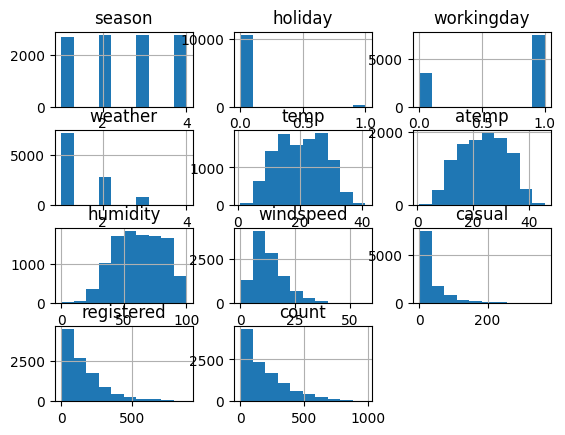

In [57]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [58]:
# create a new feature
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
test['hour'] = pd.to_datetime(test['datetime']).dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [59]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["season"].astype("category")

In [60]:
# View are new feature
train.head()
#train.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

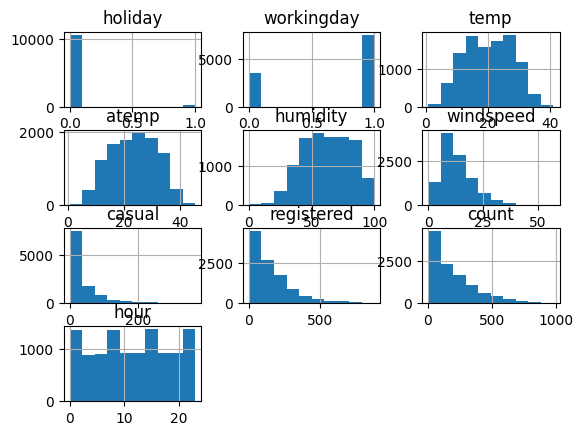

In [61]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [62]:
df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

# df_train_col_clean.head()

predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_new_features_col_clean,
    presets="best_quality",
    time_limit=600 #seconds
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240122_162823"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240122_162823/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 165 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 435 seconds.
Starting full fit now with num_stack_leve

In [63]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -29.308379  root_mean_squared_error       9.733176  320.754707                0.000229           0.250856            3       True         24
1      NeuralNetFastAI_BAG_L2  -29.578296  root_mean_squared_error       9.208974  293.374592                0.118929          16.079159            2       True         18
2             LightGBM_BAG_L2  -30.462004  root_mean_squared_error       9.231811  280.309375                0.141766           3.013943            2       True         14
3        CatBoost_r177_BAG_L2  -30.464158  root_mean_squared_error       9.180673  292.528541                0.090627          15.233109            2       True         22
4             CatBoost_BAG_L2  -30.608538  root_mean_squared_error       9.158

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [64]:
predictions_new_features = predictor_new_features.predict(test)
# predictions_new_features.head()

# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [65]:
submission_new_features = submission.copy()

# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [66]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 188k/188k [00:11<00:00, 17.2kB/s]
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-01-22 16:39:07  new features                       complete  0.80276      0.80276       
submission.csv               2024-01-22 16:28:19  first raw submission               complete  1.78497      1.78497       
submission_hp2.csv           2024-01-22 16:03:52  hp2                                complete  0.65094      0.65094       
submission_hp1.csv           2024-01-22 15:51:33  hp1                                complete  0.53757      0.53757       


#### New Score of `0.80276`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

### HP0 - Attempt
Trayed some FASTAI dropout lower interval and activation as relu

In [68]:
from autogluon.common import space

## fstai_options

dropout_prob = space.Real(0.0, 0.2, default=0.1)
activation = 'relu'

nn_fstai_options = {  
    'dropout_prob' : dropout_prob,
    'activation': activation,
}

hyperparameters = {  # hyperparameters of each model type
                   'FASTAI': nn_fstai_options
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

## general
time_limit = 600  # train various models for seconds

df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

predictor_hp0 = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_new_features_col_clean,
    time_limit=time_limit, #seconds
    hyperparameters=hyperparameters
)

predictor_hp0.fit_summary()
predictions_hp0 = predictor_hp0.predict(test)

#submit
predictions_hp0[predictions_hp0<0] = 0
submission_hp0 = submission.copy()

# Same submitting predictions
submission_hp0["count"] = predictions_hp0
submission_hp0.to_csv("submission_hp0.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_hp0.csv -m "hp0"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


No path specified. Models will be saved in: "AutogluonModels/ag-20240122_163914"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240122_163914"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.7
Operating System:   Linux
Platform Machine:   aarch64
Platform Version:   #1 SMP PREEMPT Tue Sep 13 07:51:32 

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetFastAI -45.039873  root_mean_squared_error       0.009238  6.427037                0.009238           6.427037            1       True          1
1  WeightedEnsemble_L2 -45.039873  root_mean_squared_error       0.009415  6.428667                0.000177           0.001630            2       True          2
Number of models trained: 2
Types of models trained:
{'NNFastAiTabularModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 2 | ['humidity', 'hour']
('int', ['bool'])            : 2 | ['holiday', '

#### New Score of `0.68077`

### HP1 - Attempt
Trayed some GBM parameters

In [69]:
from autogluon.common import space

## gbm_options
gbm_options = {  
    'num_boost_round': 200000,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': 72,  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

## general
time_limit = 600  # train various models for seconds

df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

predictor_hp1 = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_new_features_col_clean,
    time_limit=time_limit, #seconds
    hyperparameters=hyperparameters
)

predictor_hp1.fit_summary()
predictions_hp1 = predictor_hp1.predict(test)

#submit
predictions_hp1[predictions_hp1<0] = 0
submission_hp1 = submission.copy()

# Same submitting predictions
submission_hp1["count"] = predictions_hp1
submission_hp1.to_csv("submission_hp1.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_hp1.csv -m "hp1"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

No path specified. Models will be saved in: "AutogluonModels/ag-20240122_163944"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240122_163944"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.7
Operating System:   Linux
Platform Machine:   aarch64
Platform Version:   #1 SMP PREEMPT Tue Sep 13 07:51:32 

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             LightGBM -34.495798  root_mean_squared_error       0.006553   0.96386                0.006553            0.96386            1       True          1
1  WeightedEnsemble_L2 -34.495798  root_mean_squared_error       0.006703   0.96540                0.000150            0.00154            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 2 | ['humidity', 'hour']
('int', ['bool'])            : 2 | ['holiday', 'workingday']

#### New Score of `0.58452`

### HP2 - Attempt
Trayed a FASTAI and GBM different parameters, plus explicit kwargs

In [70]:
from autogluon.common import space

## fstai_options
learning_rate = space.Real(1e-5, 1e-2, default=5e-4, log=True)
dropout_prob = space.Real(0.0, 0.1, default=0.1)
activation = 'sigmoid'

nn_fstai_options = {  
    'learning_rate': learning_rate,
    'dropout_prob' : dropout_prob,
    'activation': activation,
}

## gbm_options
gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': 36,  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'FASTAI': nn_fstai_options, 
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

## general
time_limit = 600  # train various models for seconds
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'ASHA',
    'searcher': search_strategy,
}

df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

predictor_hp2 = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_new_features_col_clean,
    time_limit=time_limit, #seconds
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

predictor_hp2.fit_summary()
predictions_hp2 = predictor_hp2.predict(test)

#submit
predictions_hp2[predictions_hp2<0] = 0
submission_hp2 = submission.copy()

# Same submitting predictions
submission_hp2["count"] = predictions_hp2
submission_hp2.to_csv("submission_hp2.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_hp2.csv -m "hp2"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


Fitted model: NeuralNetFastAI/69cba036 ...
	-46.7895	 = Validation score   (-root_mean_squared_error)
	6.39s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetFastAI/12c2790e ...
	-76.1467	 = Validation score   (-root_mean_squared_error)
	4.64s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetFastAI/470ee754 ...
	-50.9182	 = Validation score   (-root_mean_squared_error)
	5.75s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetFastAI/65ca98a1 ...
	-95.617	 = Validation score   (-root_mean_squared_error)
	7.6s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetFastAI/3806dcd5 ...
	-102.3518	 = Validation score   (-root_mean_squared_error)
	6.2s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetFastAI/1e9a169b ...
	-127.4601	 = Validation score   (-root_mean_squared_error)
	0.65s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetFastAI/122a2439 ..

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2  -46.522323  root_mean_squared_error       0.056837  12.183590                0.000185           0.050053            2       True         11
1   NeuralNetFastAI/69cba036  -46.789475  root_mean_squared_error       0.019170   6.386479                0.019170           6.386479            1       True          1
2   NeuralNetFastAI/470ee754  -50.918172  root_mean_squared_error       0.037483   5.747058                0.037483           5.747058            1       True          3
3   NeuralNetFastAI/3ce2c837  -68.860704  root_mean_squared_error       0.035951   2.847425                0.035951           2.847425            1       True         10
4   NeuralNetFastAI/12c2790e  -76.146663  root_mean_squared_error       0.026505   4.637

#### New Score of `0.63345`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

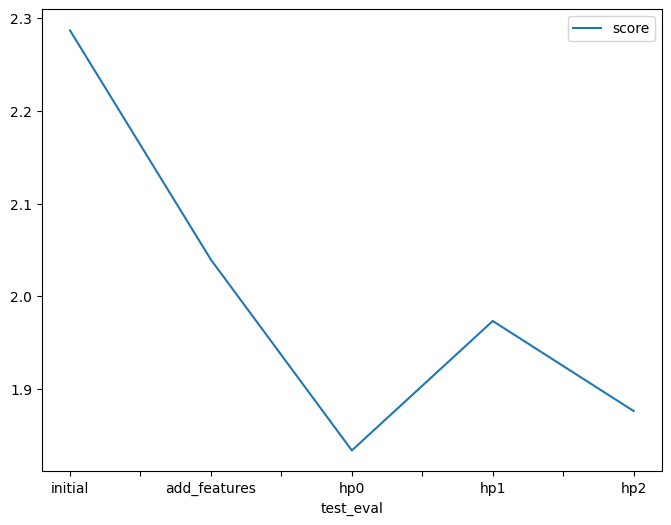

In [84]:
# Training predictions and scores
## Initial
predictions = predictor.predict(df_train_col_clean)
predictions[predictions<0] = 0
submission["count"] = predictions
submission.to_csv("submission_train.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_train.csv -m "train first raw submission"

## Add features
df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

predictions_new_features = predictor_new_features.predict(df_train_new_features_col_clean)
predictions_new_features[predictions_new_features<0] = 0
submission["count"] = predictions_new_features
submission.to_csv("submission_train_new_features.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_train_new_features.csv -m "train new features"

## Hp0
predictions_hp0 = predictor_hp0.predict(df_train_new_features_col_clean)
predictions_hp0[predictions_hp0<0] = 0
submission["count"] = predictions_hp0
submission.to_csv("submission_train_hp0.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_train_hp0.csv -m "train hp0"

## Hp1
predictions_hp1 = predictor_hp1.predict(df_train_new_features_col_clean)
predictions_hp1[predictions_hp1<0] = 0
submission["count"] = predictions_hp1
submission.to_csv("submission_train_hp1.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_train_hp1.csv -m "train hp1"

## Hp2
predictions_hp2 = predictor_hp2.predict(df_train_new_features_col_clean)
predictions_hp2[predictions_hp2<0] = 0
submission["count"] = predictions_hp2
submission.to_csv("submission_train_hp2.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_train_hp2.csv -m "train hp2"

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

# Training scores
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hp0", "hp1" ,"hp2"],
        "score": [2.28671, 2.03946, 1.83376, 1.97335, 1.87625]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_train.csv         2024-01-22 17:09:35  train first raw submission         complete  2.28671      2.28671       
submission_hp2.csv           2024-01-22 16:40:29  hp2                                complete  0.63345      0.63345       
submission_hp1.csv           2024-01-22 16:39:56  hp1                                complete  0.58452      0.58452       
submission_hp0.csv           2024-01-22 16:39:37  hp0                                complete  0.68077      0.68077       


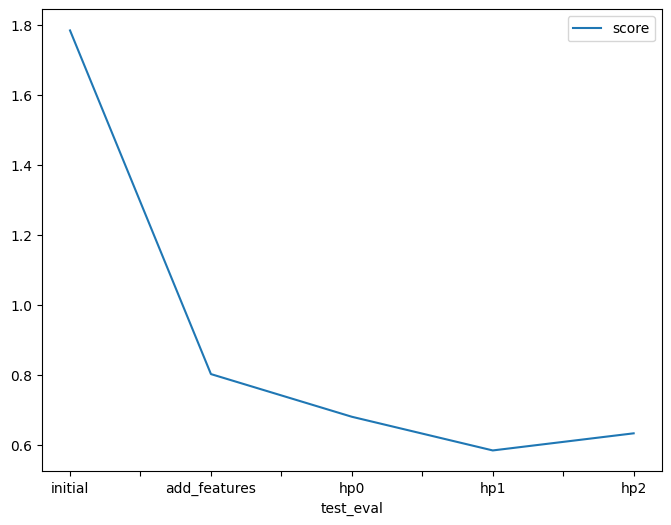

In [77]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hp0", "hp1" ,"hp2"],
        "score": [1.78497, 0.80276, 0.68077, 0.58452, 0.63345]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [83]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features"],
    "no-optimization": [2.28671, 2.03946],
    "hpo0": ['', 1.83376],
    "hpo1": ['', 1.97335],
    "hpo2": ['', 1.87625]
})

,model,no-optimization,hpo0,hpo1,hpo2
0,initial,2.28671,,,
1,add_features,2.03946,1.83376,1.97335,1.87625


In [76]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features"],
    "no-optimization": [1.78497, 0.80276],
    "hpo0": ['', 0.68077],
    "hpo1": ['', 0.58452],
    "hpo2": ['', 0.63345]
})

,model,no-optimization,hpo0,hpo1,hpo2
0,initial,1.78497,,,
1,add_features,0.80276,0.68077,0.58452,0.63345
